In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
for i,col in enumerate(data.columns):
  print(f"columns {i} is {col}")

columns 0 is Id
columns 1 is SepalLengthCm
columns 2 is SepalWidthCm
columns 3 is PetalLengthCm
columns 4 is PetalWidthCm
columns 5 is Species


In [5]:
data.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [6]:
data = data.drop(columns=["Id"],axis=1)


In [7]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
clustering_data = data.iloc[:,[0,1,2,3]].values
clustering_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

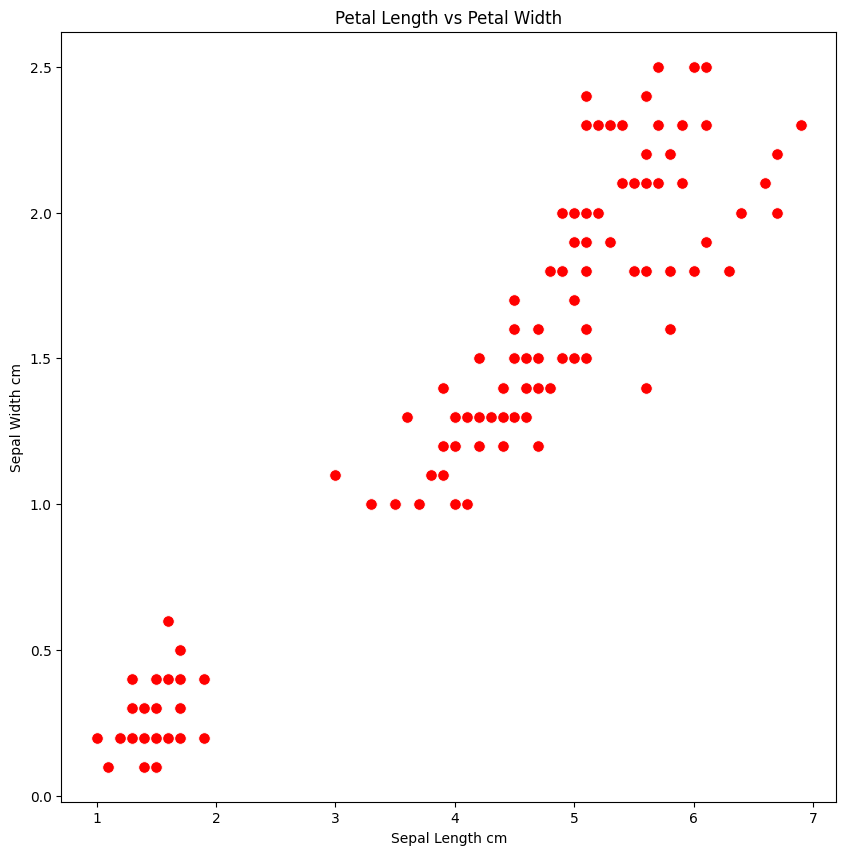

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x=data['PetalLengthCm'], y=data['PetalWidthCm'], s=70, color="red")
ax.set_ylabel("Sepal Width cm")
ax.set_xlabel("Sepal Length cm")
plt.title("Petal Length vs Petal Width")
plt.show()

In [10]:
wcss = []
for i in range(1,11):
   kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
   kmeans.fit(clustering_data)
   wcss.append(kmeans.inertia_)

In [11]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94506582597728,
 57.44028021295475,
 46.535582051282034,
 39.251830892636775,
 35.04275995246584,
 30.217021122152712,
 28.7564561965812,
 28.424891802641817]

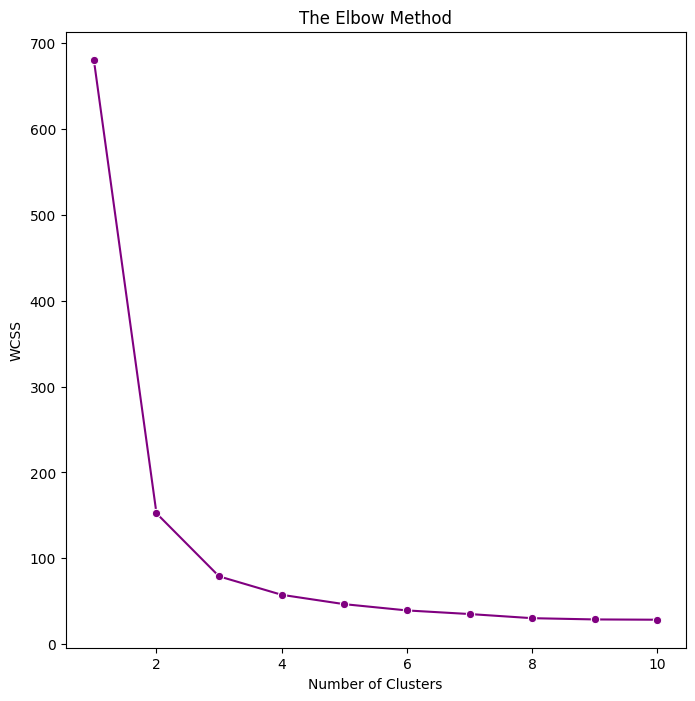

In [12]:
plt.subplots(figsize=(8,8))
sns.lineplot(x=list(range(1,11)),y=wcss,marker='o',color="purple")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method")
plt.show()

In [13]:
kmean = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmean.fit_predict(clustering_data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0], dtype=int32)

In [19]:
clustering_data = pd.DataFrame(clustering_data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
X = clustering_data[['PetalLengthCm', 'PetalWidthCm']].values

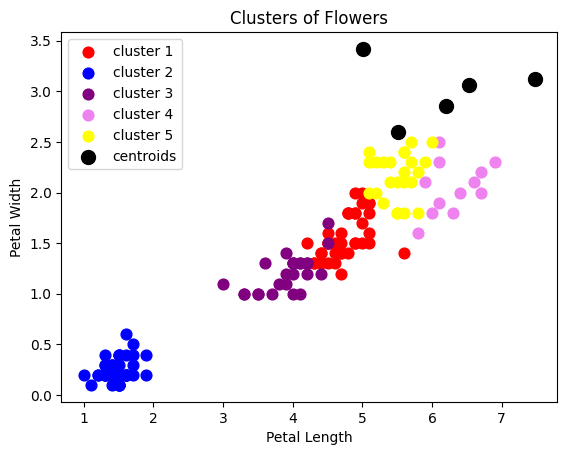

In [20]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=60, c='red', label='cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=60, c='blue', label='cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=60, c='purple', label='cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=60, c='violet', label='cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=60, c='yellow', label='cluster 5')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s=100, c='black', label='centroids')
plt.title("Clusters of Flowers")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()